# New section

In [3]:

! pip install pmdarima


     |████████████████████████████████| 1.5MB 4.2MB/s 
     |████████████████████████████████| 8.7MB 16.8MB/s 
     |████████████████████████████████| 2.1MB 43.8MB/s 
     |████████████████████████████████| 808kB 45.2MB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
  Found existing installation: Cython 0.29.21
    Uninstalling Cython-0.29.21:
      Successfully uninstalled Cython-0.29.21
  Found existing installation: setuptools 50.3.2
    Uninstalling setuptools-50.3.2:
      Successfully uninstalled setuptools-50.3.2


In [2]:
from pmdarima.arima import auto_arima


ModuleNotFoundError: ignored

In [4]:
import pandas as pd


df = pd.read_excel('owid-covid-data.xlsx')

In [187]:
df

,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-23,AFG,Asia,Afghanistan,NaN,0.0,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2020-01-24,AFG,Asia,Afghanistan,NaN,0.0,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2020-01-25,AFG,Asia,Afghanistan,NaN,0.0,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2020-01-26,AFG,Asia,Afghanistan,NaN,0.0,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2020-01-27,AFG,Asia,Afghanistan,NaN,0.0,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-25,NaN,NaN,International,721.0,0.0,0.0,15.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-11-26,NaN,NaN,International,721.0,0.0,0.0,15.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-11-27,NaN,NaN,International,721.0,0.0,0.0,15.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df["total_deaths"].fillna(0.0, inplace = True) 

In [6]:
import numpy as np

from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [22]:
dates=[]
for date in df.loc[df['location']=='International']['date']:
  dates.append(date)
print(dates)

['2020-01-23', '2020-01-24', '2020-01-25', '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29', '2020-01-30', '2020-01-31', '2020-02-01', '2020-02-02', '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06', '2020-02-07', '2020-02-08', '2020-02-09', '2020-02-10', '2020-02-11', '2020-02-12', '2020-02-13', '2020-02-14', '2020-02-15', '2020-02-16', '2020-02-17', '2020-02-18', '2020-02-19', '2020-02-20', '2020-02-21', '2020-02-22', '2020-02-23', '2020-02-24', '2020-02-25', '2020-02-26', '2020-02-27', '2020-02-28', '2020-02-29', '2020-03-01', '2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05', '2020-03-06', '2020-03-07', '2020-03-08', '2020-03-09', '2020-03-10', '2020-03-11', '2020-03-12', '2020-03-13', '2020-03-14', '2020-03-15', '2020-03-16', '2020-03-17', '2020-03-18', '2020-03-19', '2020-03-20', '2020-03-21', '2020-03-22', '2020-03-23', '2020-03-24', '2020-03-25', '2020-03-26', '2020-03-27', '2020-03-28', '2020-03-29', '2020-03-30', '2020-03-31', '2020-04-01', '2020-04-02', '2020

In [ ]:
total=[]
for date in df.loc[df['location']=='International']['date']:
  total.append(df.loc[df['date'] == date]["new_deaths"].sum())
  #print(df.loc[df['date'] == date]["total_deaths"].sum())
#print(total)


In [27]:
df1 = pd.DataFrame()

df1['dates']=dates
df1['total']=total
df1.to_excel('owid-covid-data.xlsx', index='false')

df1

,dates,total
0,2020-01-23,2.0
1,2020-01-24,16.0
2,2020-01-25,32.0
3,2020-01-26,28.0
4,2020-01-27,52.0
...,...,...
307,2020-11-25,24112.0
308,2020-11-26,21478.0
309,2020-11-27,21234.0
310,2020-11-28,19492.0


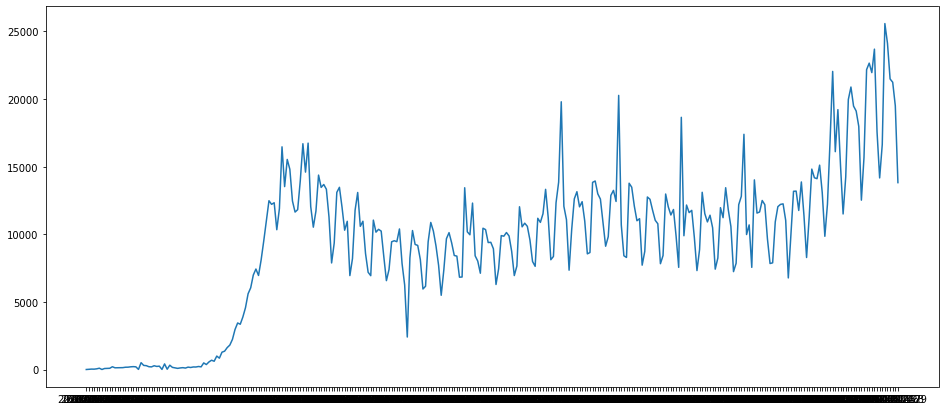

In [56]:
plt.figure(figsize=(16,7))

plt.plot(df1['dates'],df1['total'],label='Total Deaths')




/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


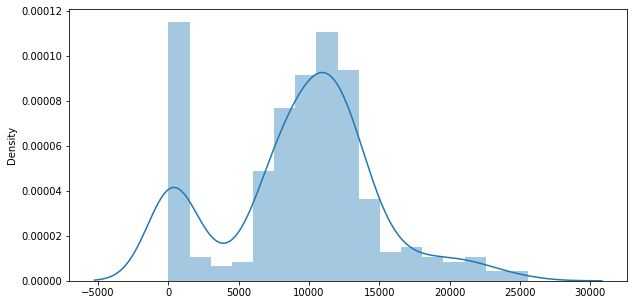

In [29]:
import seaborn as sns
plt.figure(figsize = (10, 5)) 
sns.distplot(x=df1['total'])

In [49]:
import plotly.express as px
df_by_date = pd.DataFrame(df.groupby(['date'])['new_deaths'].sum().sort_values().reset_index())

fig = px.bar(df_by_date.loc[(df_by_date.date >= '2020-01-23')].sort_values('new_deaths',ascending = False), 
             x='date', y='new_deaths', color="new_deaths", color_continuous_scale=px.colors.sequential.BuGn)
fig.update_layout(title_text='Confirmed COVID-19 deaths per day in World')
fig.show()

In [45]:
import plotly.express as px
df_by_date = pd.DataFrame(df.groupby(['continent','date'])['new_deaths'].sum().sort_values().reset_index())

fig = px.bar(df_by_date.loc[(df_by_date['continent'] == 'Asia') &(df_by_date.date >= '2020-01-23')].sort_values('new_deaths',ascending = False), 
             x='date', y='new_deaths', color="new_deaths", color_continuous_scale=px.colors.sequential.BuGn)
fig.update_layout(title_text='Confirmed COVID-19 deaths per day in Asia')
fig.show()

In [64]:
case='new_deaths'
def timeCompare(time,*argv):
    Coun1=argv[0]
    Coun2=argv[1]
    f,ax=plt.subplots(figsize=(16,5))
    labels=argv  
    continent=df.loc[(df['continent']==Coun1)]
    plt.plot(continent['date'],continent[case],linewidth=2)
    plt.xticks([])
    plt.legend(labels)
    ax.set(title=' Evolution of actual cases',ylabel='Number of cases' )

    continent2=df.loc[df['continent']==Coun2]
    #country2['Date']=country2['Date']-datetime.timedelta(days=time)
    plt.plot(continent2['date'],continent[case],linewidth=2)
    #plt.xticks([])
    plt.legend(labels)
    ax.set(title=' Evolution of cases in %d days difference '%time ,ylabel='Number of %s cases'%case )

    plt.figure(figsize=(16,7))

plt.plot(df1['dates'],df1['total'],label='Total Deaths')

In [69]:
df2=df.groupby(['date','continent']).agg('sum').reset_index()
df2

,date,continent,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,2020-01-01,North America,0.0,0.0,0.000,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,25.0,0.000,0.000,0.0,0.000,0.00,0.000,0.00,128932753.0,66.444,29.3,6.857,4.321,17336.469,2.5,152.783,13.06,6.9,21.4,87.847,1.38,75.05,0.774
1,2020-01-02,North America,0.0,0.0,0.000,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,97.0,72.0,0.001,0.001,0.0,0.000,0.00,0.000,0.00,128932753.0,66.444,29.3,6.857,4.321,17336.469,2.5,152.783,13.06,6.9,21.4,87.847,1.38,75.05,0.774
2,2020-01-03,North America,0.0,0.0,0.000,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,186.0,89.0,0.001,0.001,0.0,0.000,0.00,0.000,0.00,128932753.0,66.444,29.3,6.857,4.321,17336.469,2.5,152.783,13.06,6.9,21.4,87.847,1.38,75.05,0.774
3,2020-01-04,Asia,0.0,0.0,0.000,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.000,0.000,0.0,0.000,0.00,0.000,0.00,69799978.0,135.132,40.1,11.373,6.890,16277.671,0.1,109.861,7.04,1.9,38.8,90.670,2.10,77.15,0.755
4,2020-01-04,North America,0.0,0.0,0.000,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,231.0,45.0,0.002,0.000,0.0,0.000,0.00,0.000,0.00,128932753.0,66.444,29.3,6.857,4.321,17336.469,2.5,152.783,13.06,6.9,21.4,87.847,1.38,75.05,0.774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1911,2020-11-29,Oceania,30663.0,16.0,19.857,942.0,1.0,0.143,1730.620,1.636,2.492,43.805,0.039,0.006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9972019.0,0.0,391.061,0.000,43309.0,2.667,5416.44,0.001,69.44,41218807.0,428.843,170.9,48.759,29.938,102207.756,40.2,2774.775,106.52,64.3,151.8,143.601,12.85,514.84,4.998
1912,2020-11-29,South America,11091972.0,44850.0,56000.999,324524.0,755.0,1066.859,200686.186,847.850,890.753,6491.685,17.845,20.417,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,430201.0,5867.0,123.844,1.689,4405.0,1.268,30.32,0.033,250.00,430457607.0,292.704,362.6,99.327,62.232,166089.423,25.8,2247.887,93.73,98.4,197.3,395.944,24.82,901.09,9.010
1913,2020-11-30,Africa,0.0,0.0,0.000,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,624115.0,2042.0,48.186,0.158,2405.0,0.186,0.00,0.000,0.00,12952209.0,494.869,20.3,2.974,1.642,1854.211,56.0,191.375,4.28,4.7,21.0,4.617,0.00,69.02,0.524
1914,2020-11-30,Asia,0.0,0.0,0.000,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5041547.0,23510.0,1259.554,6.053,29006.0,6.322,0.00,0.000,0.00,52970766.0,2463.874,75.8,16.286,10.009,79229.079,0.2,237.687,23.32,12.0,78.5,0.000,14.27,160.32,1.749


In [88]:
case='new_deaths'
def timeCompare_f(*argv):
    Coun1=argv[0]
    Coun2=argv[1]
    Coun3=argv[2]
    Coun4=argv[3]
    Coun5=argv[4]
    Coun6=argv[5]
    Coun7=argv[6]
    f,ax=plt.subplots(figsize=(16,5))
    labels=argv  
    country=df2.loc[(df2['continent']==Coun1)]
    plt.plot(country['date'],country[case],linewidth=2)
    plt.xticks([])
    plt.legend(labels)
    ax.set(title=' Evolution of actual cases',ylabel='Number of cases' )

    country2=df2.loc[df2['continent']==Coun2]
    #country2['Date']=country2['Date']-datetime.timedelta(days=time)
    plt.plot(country2['date'],country2[case],linewidth=2)
    #plt.xticks([])
    plt.legend(labels)

    country3=df2.loc[df2['continent']==Coun3]
    #country2['Date']=country2['Date']-datetime.timedelta(days=time)
    plt.plot(country3['date'],country3[case],linewidth=2)
    #plt.xticks([])
    plt.legend(labels)


    country4 =df2.loc[df2['continent']==Coun4]
    #country2['Date']=country2['Date']-datetime.timedelta(days=time)
    plt.plot(country4['date'],country4[case],linewidth=2)
    #plt.xticks([])
    plt.legend(labels)

    country5=df2.loc[df2['continent']==Coun5]
    #country2['Date']=country2['Date']-datetime.timedelta(days=time)
    plt.plot(country5['date'],country5[case],linewidth=2)
    #plt.xticks([])
    plt.legend(labels)

    country6=df2.loc[df2['continent']==Coun6]
    #country2['Date']=country2['Date']-datetime.timedelta(days=time)
    plt.plot(country6['date'],country6[case],linewidth=2)
    #plt.xticks([])
    plt.legend(labels)

    country7=df2.loc[df2['continent']==Coun7]
    #country2['Date']=country2['Date']-datetime.timedelta(days=time)
    plt.plot(country7['date'],country7[case],linewidth=2)
    #plt.xticks([])
    plt.legend(labels)

    ax.set(title=' Evolution of Fatalities  ' ,ylabel='Number of %s cases'%case )

array(['Asia', 'Africa', 'Europe', 'South America', 'North America',
       'Oceania', nan], dtype=object)

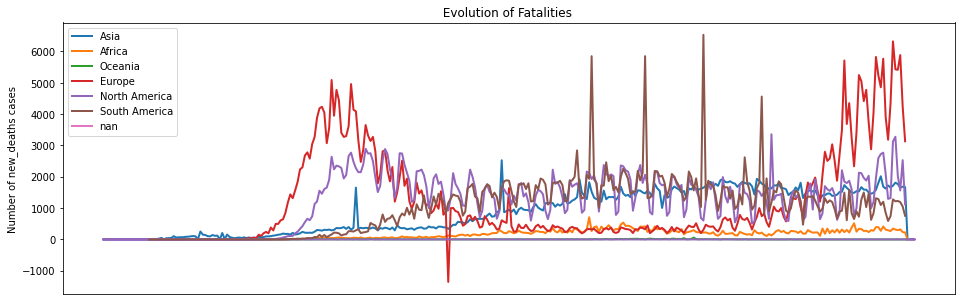

In [90]:
timeCompare_f('Asia','Africa','Oceania','Europe','North America','South America','nan')

In [161]:

sns.set(palette = 'Set1',style='darkgrid')
#Function for making a time serie on a designated country and plotting the rolled mean and standard 
def roll(country,case='new_deaths'):
    ts=df2.loc[(df['continent']==country)]  
    ts=ts[['date',case]]
    ts=ts.set_index('date')
    ts.astype('int64')
    a=len(ts.loc[(ts['new_deaths']>=10)])
    ts=ts[-a:]
    return (ts.rolling(window=4,center=False).mean().dropna())


def rollPlot(country, case='new_deaths'):
    ts=df2.loc[(df['continent']==country)]  
    ts=ts[['date',case]]
    ts=ts.set_index('date')
    ts.astype('int64')
    a=len(ts.loc[(ts['new_deaths']>=10)])
    ts=ts[-a:]
    plt.figure(figsize=(20,6))
    plt.plot(ts.rolling(window=7,center=False).mean().dropna(),label='Rolling Mean')
    plt.plot(ts[case])
    plt.plot(ts.rolling(window=7,center=False).std(),label='Rolling std')
    plt.legend()
    plt.title('Death Cases distribution in %s with rolling mean and standard' %country)
    plt.xticks([])

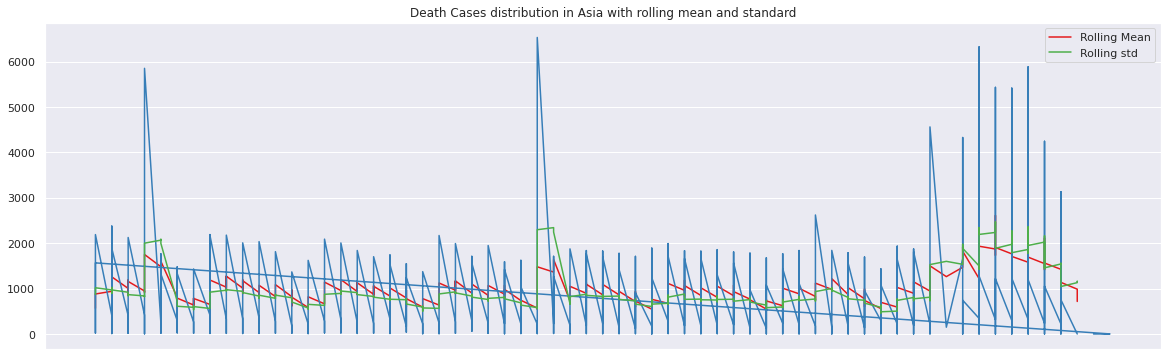

In [162]:

tsC1=roll('Asia')
rollPlot('Asia')


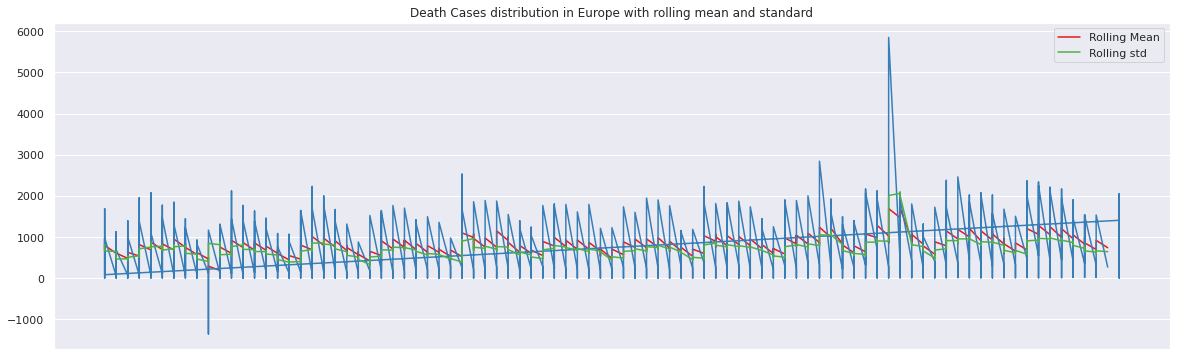

In [169]:

tsC2=roll('Europe')
rollPlot('Europe')


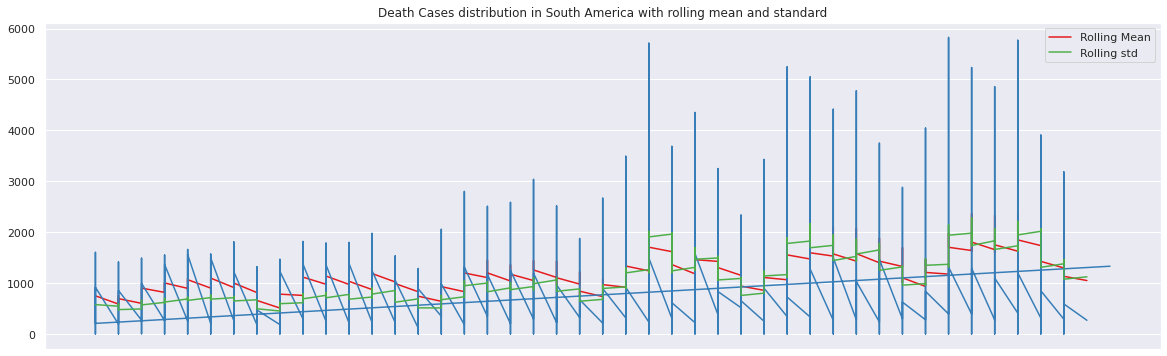

In [170]:

tsC3=roll('South America')
rollPlot('South America')


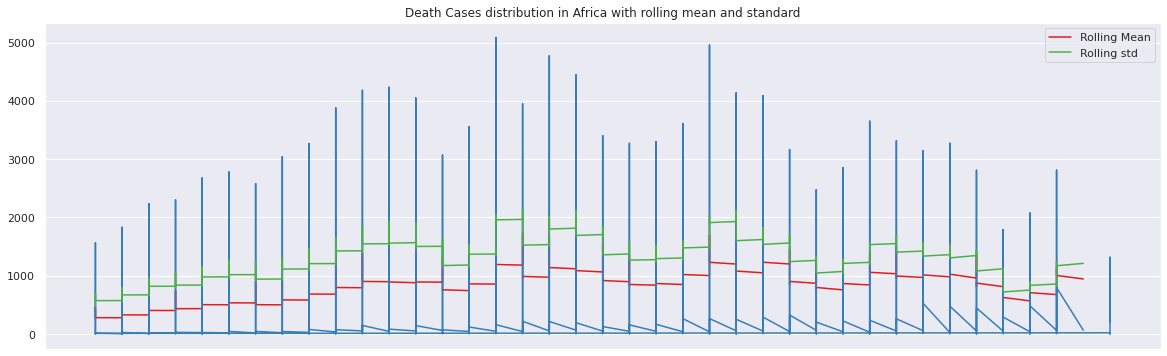

In [171]:

tsC4=roll('Africa')
rollPlot('Africa')


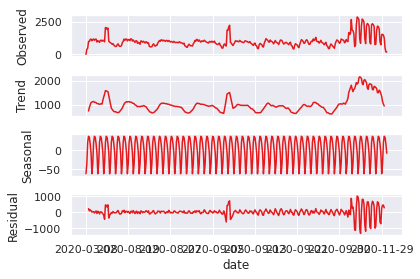

In [172]:
import plotly.express as px
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, acf, pacf,arma_order_select_ic
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import warnings
warnings.simplefilter('ignore')
fig=sm.tsa.seasonal_decompose(tsC1['new_deaths'],freq=7).plot()



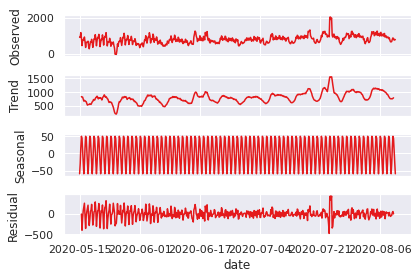

In [173]:
fig=sm.tsa.seasonal_decompose(tsC2['new_deaths'],freq=7).plot()

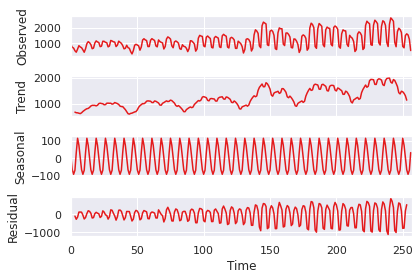

In [174]:
fig=sm.tsa.seasonal_decompose(tsC3.values,freq=7).plot()

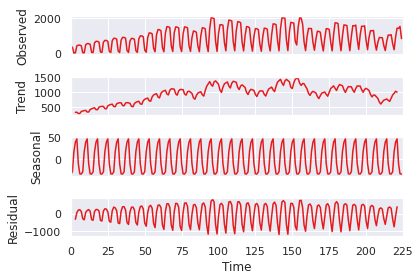

In [175]:
fig=sm.tsa.seasonal_decompose(tsC4.values,freq=7).plot()

In [178]:
def stationarity(ts):
    print('Results of Dickey-Fuller Test:')
    test = adfuller(ts, autolag='AIC')
    results = pd.Series(test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for i,val in test[4].items():
        results['Critical Value (%s)'%i] = val
    print (results)

print("\n ASIA")
tsC=tsC1['new_deaths'].values
stationarity(tsC)
print("\n EUROPE")
tsC=tsC2['new_deaths'].values
stationarity(tsC)
print("\n SOUTH AMERICA")
tsC=tsC3['new_deaths'].values
stationarity(tsC)
print("\n AFRICA")
tsC=tsC1['new_deaths'].values
stationarity(tsC)


 ASIA
Results of Dickey-Fuller Test:
Test Statistic                  -2.650118
p-value                          0.083075
#Lags Used                      16.000000
Number of Observations Used    340.000000
Critical Value (1%)             -3.449730
Critical Value (5%)             -2.870079
Critical Value (10%)            -2.571319
dtype: float64

 EUROPE
Results of Dickey-Fuller Test:
Test Statistic                  -5.067708
p-value                          0.000016
#Lags Used                      14.000000
Number of Observations Used    511.000000
Critical Value (1%)             -3.443212
Critical Value (5%)             -2.867213
Critical Value (10%)            -2.569791
dtype: float64

 SOUTH AMERICA
Results of Dickey-Fuller Test:
Test Statistic                  -1.876566
p-value                          0.343164
#Lags Used                      16.000000
Number of Observations Used    240.000000
Critical Value (1%)             -3.457894
Critical Value (5%)             -2.873659
Criti

ASIA
EUROPE
SOUTH AMERICA
AFRICA


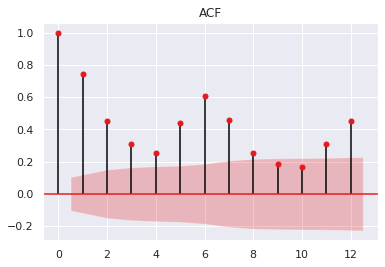

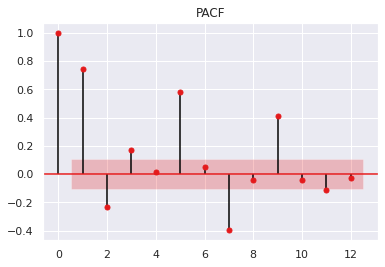

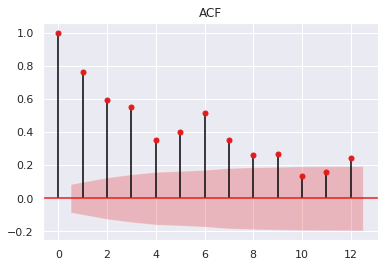

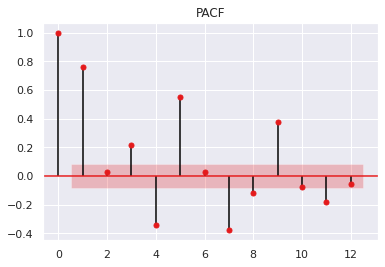

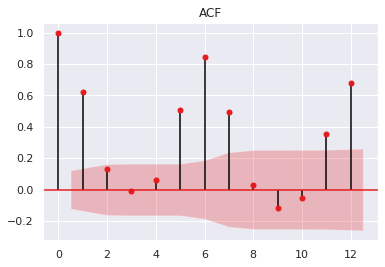

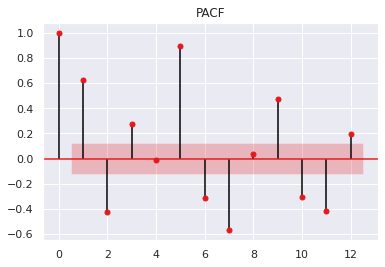

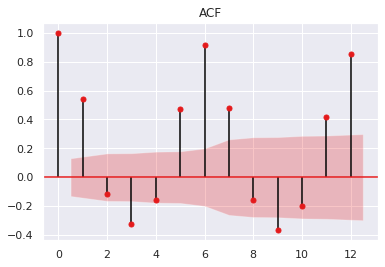

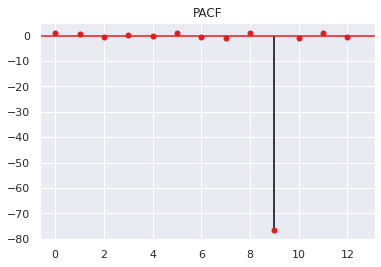

In [179]:
def corr(ts):
    plot_acf(ts,lags=12,title="ACF")
    plot_pacf(ts,lags=12,title="PACF")



print("ASIA")
corr(tsC1)
print("EUROPE")
corr(tsC2)
print("SOUTH AMERICA")
corr(tsC3)
print("AFRICA")
corr(tsC4)